In [31]:
%config Completer.use_jedi = False

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [33]:
# Read CSV
wine_csv = '/home/diemol/Insync/diemol55@gmail.com/Google Drive/Institute_of_Data/DATA/winequality_merged.csv'

#### 1.2 Explore Data (Exploratory Data Analysis)

In [34]:
# ANSWER
wine_df = pd.read_csv(wine_csv)

In [35]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [36]:
column_name = wine_df.columns

In [37]:
wine_df_columns = [wine_df.columns[i].replace(' ','_') if wine_df.columns[i].find(' ') else wine_df.columns[i] for i in range(len(wine_df.columns))]
wine_df_columns

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'red_wine']

In [38]:
new_columns = pd.Series(wine_df_columns,column_name)
new_columns.to_dict()

{'fixed acidity': 'fixed_acidity',
 'volatile acidity': 'volatile_acidity',
 'citric acid': 'citric_acid',
 'residual sugar': 'residual_sugar',
 'chlorides': 'chlorides',
 'free sulfur dioxide': 'free_sulfur_dioxide',
 'total sulfur dioxide': 'total_sulfur_dioxide',
 'density': 'density',
 'pH': 'pH',
 'sulphates': 'sulphates',
 'alcohol': 'alcohol',
 'quality': 'quality',
 'red_wine': 'red_wine'}

In [39]:
wine_df = wine_df.rename(columns = new_columns.to_dict())
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [40]:
wine_df.shape

(6497, 13)

In [41]:
wine_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [42]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


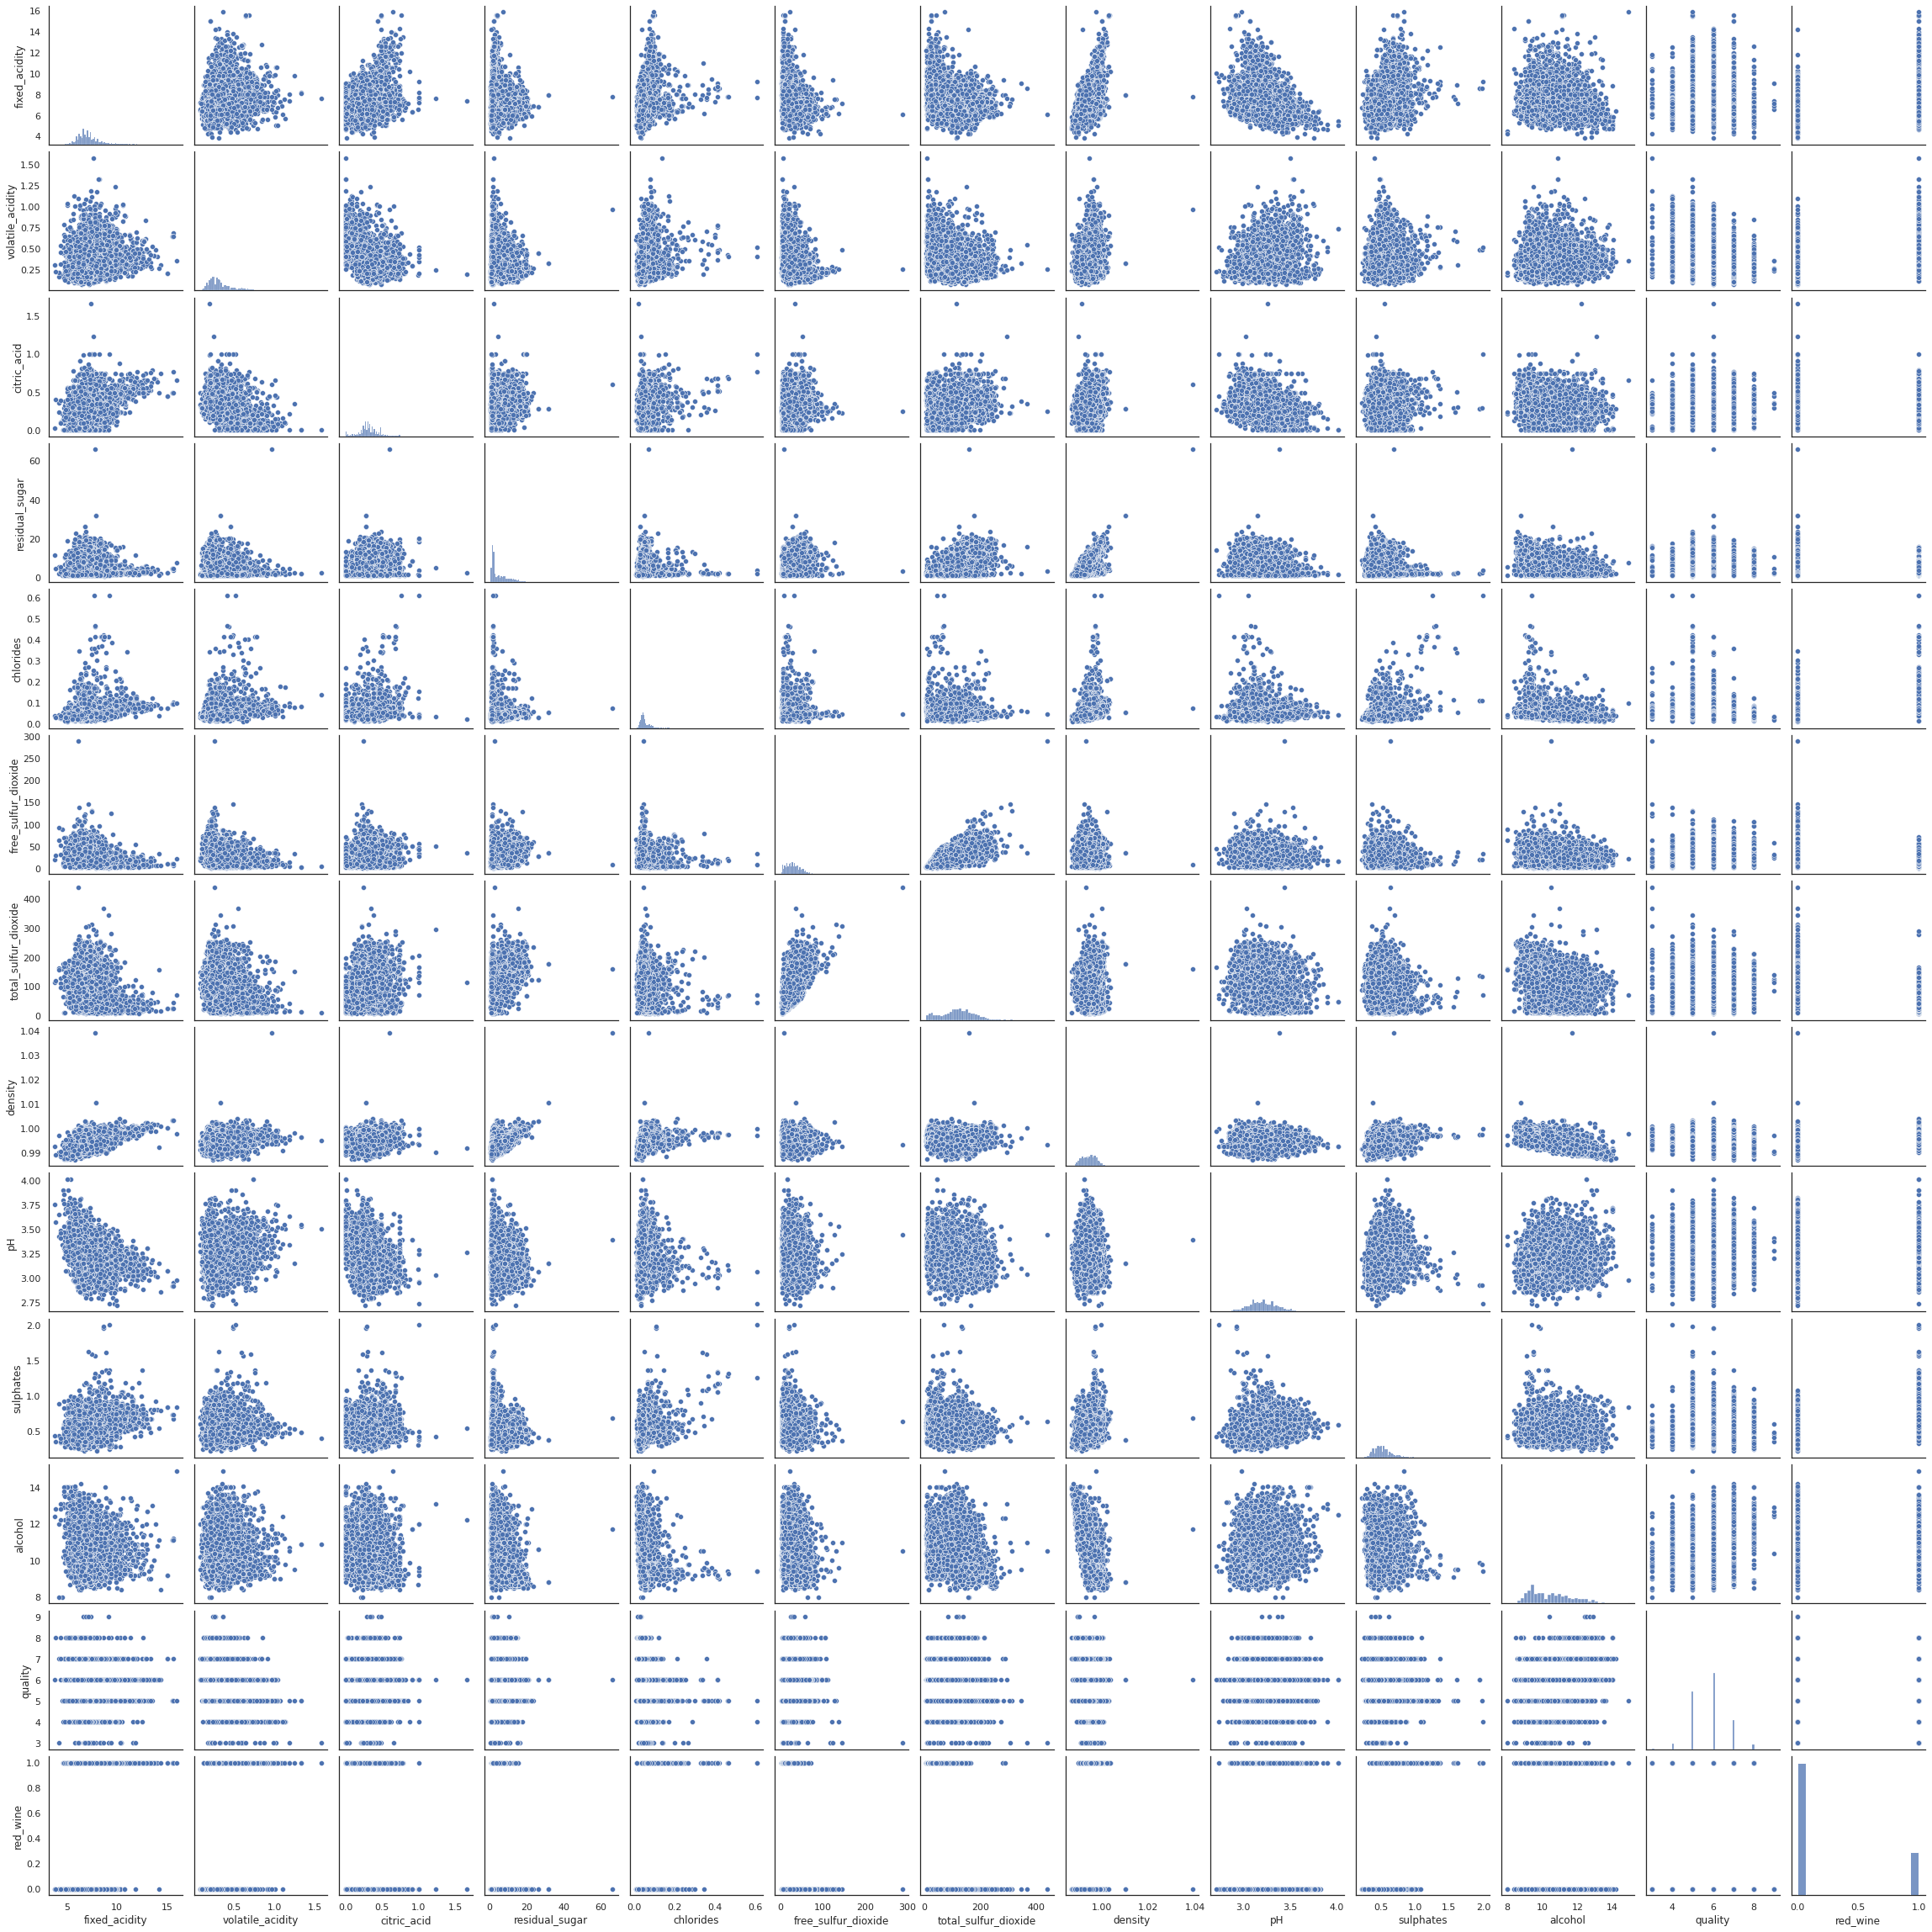

In [43]:
sns.pairplot(wine_df)
plt.show()

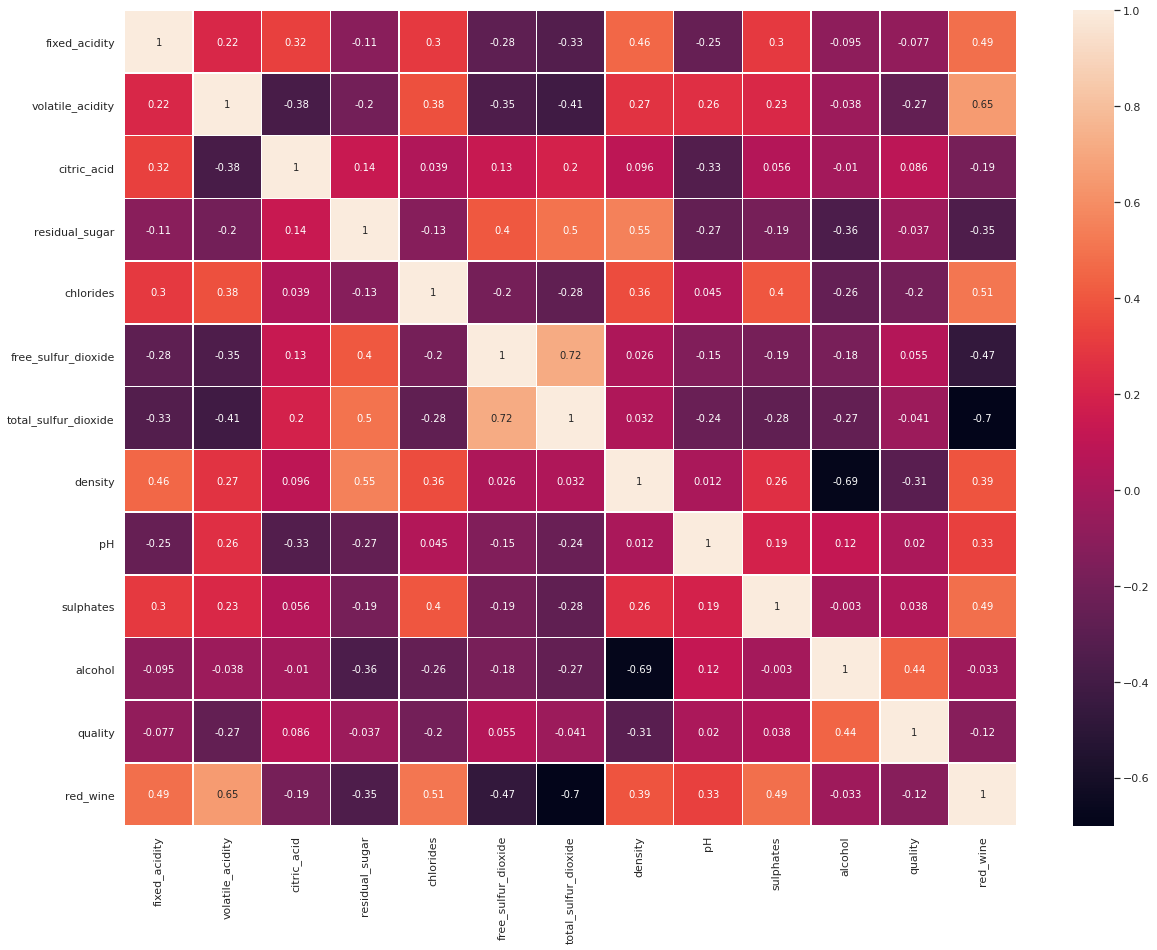

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(wine_df.corr(), annot = True, linewidths=.5)
plt.show()

In [45]:
wine_corr = wine_df.corr()

<ipython-input-46-a5b5ebddbf4e>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(wine_corr, dtype=np.bool)


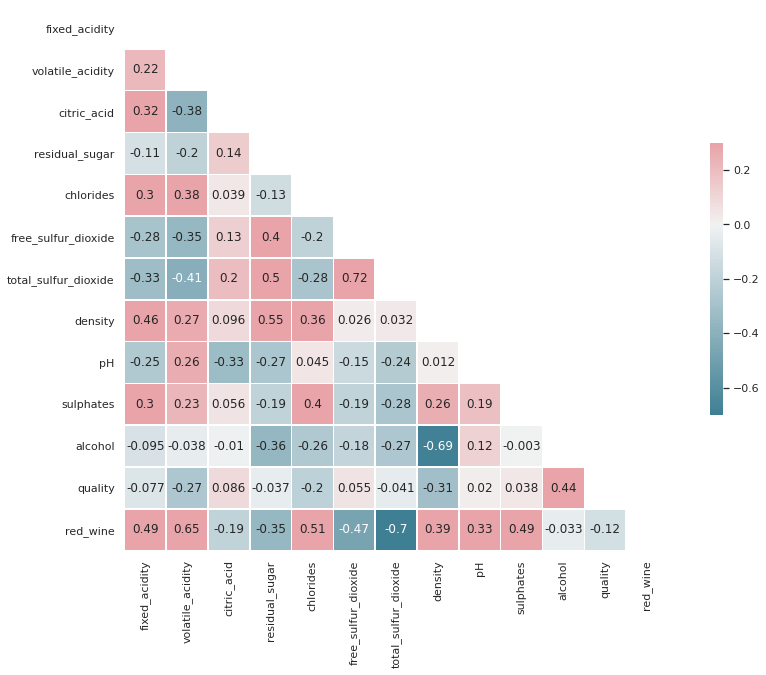

In [46]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [47]:
wine_df.corr()['quality'].sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

### 2. Set Target Variable

Create a target variable for wine quality.

In [48]:
# Target Variable
y = wine_df['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [49]:
# ANSWER
prediction_variable = ['alcohol','density','volatile_acidity','chlorides']

### 4. Using Linear Regression Create a Model and Test Score

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
X = wine_df[prediction_variable]
X.head()

,alcohol,density,volatile_acidity,chlorides
0,9.4,0.9978,0.70,0.076
1,9.8,0.9968,0.88,0.098
2,9.8,0.9970,0.76,0.092
3,9.8,0.9980,0.28,0.075
4,9.4,0.9978,0.70,0.076


In [52]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
# Create a model for Linear Regression
lr = LinearRegression()
# Fit the model with the Training data
lr.fit(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data
lr.score(X_train, y_train)

0.2707886547599643

In [54]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test,y_test)

0.2521354751304966

In [55]:
lr.coef_

array([ 0.39187742, 40.83297487, -1.51250401, -0.08243747])

In [56]:
lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

,feature,coefficient
0,alcohol,0.391877
1,density,40.832975
2,volatile_acidity,-1.512504
3,chlorides,-0.082437


In [57]:
# Make predictions using the testing set
wine_y_pred = lr.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, wine_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, wine_y_pred))

Mean squared error: 0.55
Coefficient of determination: 0.25


In [58]:
lr.predict(pd.DataFrame([9.5,0.978,0.7,0.07]).T)

array([4.19764203])

### BONUS: Cross validation

In [59]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [81]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    X_test = X.iloc[test, ]
    y_train = y.iloc[train, ]
    y_test = y.iloc[test, ]
    # OLM, GLM  
    
    
    # Fit model with training set
    lr.fit(X_train,y_train)
    
    # Make predictions with training and test set
    predict_train = lr.predict(X_train)
    predict_test = lr.predict(X_test)
    
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train,y_train))
    test_scores.append(lr.score(X_test,y_test))
    
    train_rmse.append(mean_squared_error(y_train, predict_train, squared=False))
    test_rmse.append(mean_squared_error(y_test, predict_test, squared=False))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training_R2': train_scores,
                          'Test_R2': test_scores,
                          'Training_RMSE': train_rmse,
                          'Test_RMSE' : test_rmse},
                         index=[i+1 for i in range(5)])
metrics_df


,Training_R2,Test_R2,Training_RMSE,Test_RMSE
1,0.276147,0.230807,0.742783,0.766049
2,0.269360,0.256677,0.752468,0.727189
3,0.266225,0.270943,0.739865,0.776893
4,0.260008,0.296266,0.752144,0.728422
5,0.265650,0.273534,0.749271,0.740093


In [72]:
# Describe the metrics
metrics_df.describe()

,Training_R2,Test_R2,Training_RMSE,Test_RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.270789,0.252135,0.748532,0.743191
std,0.000000,0.000000,0.000000,0.000000
min,0.270789,0.252135,0.748532,0.743191
25%,0.270789,0.252135,0.748532,0.743191
50%,0.270789,0.252135,0.748532,0.743191
75%,0.270789,0.252135,0.748532,0.743191
max,0.270789,0.252135,0.748532,0.743191


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**

In [114]:
y = wine_df['quality']

predictor_columns = [i for i in wine_df.columns if i != 'quality']
X = pd.DataFrame(wine_df, columns=predictor_columns)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [119]:
X_train.shape[0]

5197

In [120]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [121]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature alcohol with R^2 = 0.201 and adjusted R^2 = 0.201
Added feature volatile_acidity with R^2 = 0.262 and adjusted R^2 = 0.261
Added feature sulphates with R^2 = 0.273 and adjusted R^2 = 0.272
Added feature residual_sugar with R^2 = 0.282 and adjusted R^2 = 0.282
Added feature red_wine with R^2 = 0.287 and adjusted R^2 = 0.286
Added feature free_sulfur_dioxide with R^2 = 0.291 and adjusted R^2 = 0.290
Added feature total_sulfur_dioxide with R^2 = 0.295 and adjusted R^2 = 0.294
Added feature density with R^2 = 0.297 and adjusted R^2 = 0.296
Added feature chlorides with R^2 = 0.298 and adjusted R^2 = 0.297
Added feature pH   with R^2 = 0.299 and adjusted R^2 = 0.298
Added feature fixed_acidity with R^2 = 0.303 and adjusted R^2 = 0.301
Added feature citric_acid with R^2 = 0.303 and adjusted R^2 = 0.301
**************************************************

Resulting features:
alcohol, volatile_acidity, sulphates, residual_sugar, red_wine, free_sulfur_dioxide, total_sulfur_dioxide, 



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



